Creattion of a training dataset

In [3]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from schnapsen.bots import RdeepBot, AlphaBetaBot, RandBot
from schnapsen.game import (SchnapsenGamePlayEngine, GameState, BotState, SchnapsenDeckGenerator, 
                            SchnapsenHandGenerator, Bot, Score)
from schnapsen.game import Talon, Suit
from nn_bot import NNDataBot, NNPlayingBot, train_NN_model, create_replay_memory_dataset, train_model, play_games_and_return_stats, play_games_and_return_stats_test
import random
import pathlib 

bot1 = RdeepBot(5, 5, random.Random(40), "Rdeepbot_1")
bot2 = RdeepBot(10, 10, random.Random(80), "RdeepBot_2")
#Uncomment code below to create training dataset
#create_replay_memory_dataset(bot1=bot1, bot2=bot2)


Train 10 Neural Network models that range in hidden layer number from 1 to 10

In [14]:
for numberOfLayers in range(1,11):
    number_of_hidden_layers = (10, ) * numberOfLayers
    train_model(number_of_hidden_layers)

Model at NN_models\NN_model_10 exists already and will be overwritten as selected.
Dataset Statistics:
Samples of wins: 7458
Samples of losses: 7458
Training a Complex (Neural Network) model.
Starting training phase...
Iteration 1, loss = 0.74781925
Validation score: 0.473190
Iteration 2, loss = 0.71358013
Validation score: 0.505362
Iteration 3, loss = 0.69493290
Validation score: 0.548928
Iteration 4, loss = 0.68453221
Validation score: 0.569705
Iteration 5, loss = 0.67767115
Validation score: 0.593834
Iteration 6, loss = 0.67284336
Validation score: 0.605228
Iteration 7, loss = 0.66929506
Validation score: 0.605898
Iteration 8, loss = 0.66653841
Validation score: 0.604558
Iteration 9, loss = 0.66437792
Validation score: 0.605228
Iteration 10, loss = 0.66263297
Validation score: 0.613271
Iteration 11, loss = 0.66117702
Validation score: 0.615952
Iteration 12, loss = 0.65985272
Validation score: 0.612601
Iteration 13, loss = 0.65868688
Validation score: 0.615282
Iteration 14, loss = 0.

Creare 10 bots using models created above

In [2]:
path  = "NN_model"
bots = []
for numberOfLayers in range(1,11):
    model_location = pathlib.Path("NN_models") / ("NN_model" + "_10" * numberOfLayers)
    bots.append(NNPlayingBot(model_location=model_location, name = "MLPlayingBot_" + str(numberOfLayers)))

Each bot plays 1000 games against aplha beta pruning bot

Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_1 is 0.367
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_2 is 0.374
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_3 is 0.369
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_4 is 0.361
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_5 is 0.376
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_6 is 0.349
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_7 is 0.352
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_8 is 0.339
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_9 is 0.354
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_10 is 0.332
[(1, 0.367), (2, 0.374), (3, 0.369), (4, 0.361), (5, 0.376), (6, 0.349), (7, 0.352), (8, 0.339), (9, 0.354), (10, 0.332)]


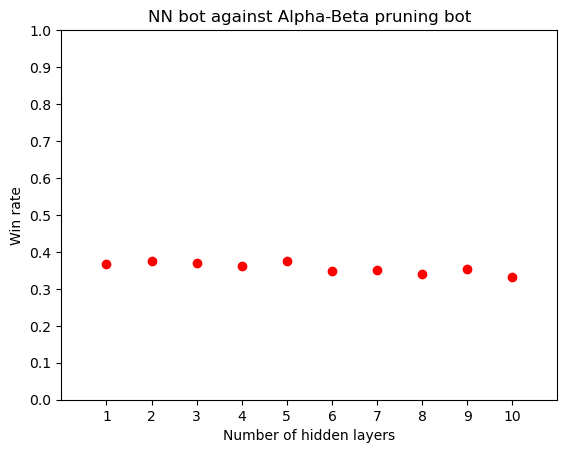

In [3]:
def non_linear_function(x, a, b, c):
    return a * np.exp(-b * x) + c
alphabeta_bot = AlphaBetaBot("Alpha-Beta_bot")
data = []
for bot in bots:
    data.append((int(''.join([char for char in bot._Bot__name if char not in "MLPlayingBot_"])), play_games_and_return_stats(bot, alphabeta_bot, 1000)))
    print(f"Winrate of {bot._Bot__name} is {data[-1][1]}")
print(data)
x, y = zip(*data)
x = list(x)
y = list(y)
plt.scatter(x, y, color=(1,0,0))
plt.xlabel('Number of hidden layers')
plt.ylabel('Win rate')
plt.title('NN bot against Alpha-Beta pruning bot')
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xticks(x)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()


Considering the data gathered above we can conclude that there is no correlation between Neural Network bot performance against alpha beta pruning bot and number of hidden layers Neural Network bot has. This might be due the fact that every weight is trained until the validation coefficient is not changing. So using current training dataset can result that training process terminated earlier than all samples in a set are explored. To conclude, the results might be due the fact that every model is trained to "perfection" and bots' win rate is the highest they could get against alpha beta pruning bot.

To check for statistical significance of the experiment we can use Spearman's correlation

In [6]:
x_values = [item[0] for item in data]
y_values = [item[1] for item in data]

spearman_corr, p_value = spearmanr(x_values, y_values)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Spearman's correlation coefficient:", spearman_corr)
print("P-value:", p_value)

Reject the null hypothesis.
Spearman's correlation coefficient: -0.7575757575757575
P-value: 0.011143446799694208
